
## Industry: Human Resource management 

### Chalenge

AB Consultants is a company that outsources its employees as Consultants to top various IT firms. They have been in the Industry for a long time. Their business had been increasing quite well over past, however in recent times there has been a slowdown in terms of growth because their best and most experienced employees have started leaving the Company. The VP of the firm is not very happy with the company’s best and most experienced employees leaving prematurely. The VP of the firm has employed you to find out insights in the Company’s Employee Data and find out an answer as to know why the best and most experienced employees are leaving.

### Solution
In this project, we are going to analyze AB Consultants data with the goal to understand why the best employees are leaving so early, and derive a forecast model to predict which employees could be leaving the company.

In [1]:
_author_ = "Bertin NGA OHANDZA"

## Data exploration

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Import librairies necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# load the HR AB Consultants data (csv file)
hr_data = pd.read_csv('HR_Data.csv')

# Success - display the first 5 rows
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


** Get data info and evaluate the number of entries, columns and if there are missing values **

In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


As we can see there are 14999 entries, and 10 columns.
Hopefully, there are no missing values because every column has 14999 non-nul elements.

** Note ** : In the column "left"; 1 means left and 0 means no left. Futhermore, the satisfaction_level is given by the employees

In [4]:
# Date description
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Number of left employees : "left ==1"
hr_data[hr_data['left'] == 1]['satisfaction_level'].count()

3571

On 14999 employees, there are 3571 left.

In [6]:
#Mean satisfation Level for left == 1
hr_data[hr_data['left']==1]['satisfaction_level'].mean()

0.44009801176140917

Obviously the mean satisfaction_level between the left employees (0.44009801176140917) is less than the general mean satisfaction_level(0.612834)

Let's look for correlations between some features. But before that, we will encode categorical data named 'sales' and 'salary'

In [7]:
# One-hot encode categorical data hr_data[['sales','salary']]
hr_data = pd.get_dummies(hr_data)

hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [8]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales_IT                 14999 non-null uint8
sales_RandD              14999 non-null uint8
sales_accounting         14999 non-null uint8
sales_hr                 14999 non-null uint8
sales_management         14999 non-null uint8
sales_marketing          14999 non-null uint8
sales_product_mng        14999 non-null uint8
sales_sales              14999 non-null uint8
sales_support            14999 non-null uint8
sales_technical          14999 non-null uint8
salary_high              14999 non-null uint8
salary_low   

In [9]:
corr_matrix = hr_data.corr()

In [10]:
corr_matrix['last_evaluation'].sort_values(ascending=False)

last_evaluation          1.000000
number_project           0.349333
average_montly_hours     0.339742
time_spend_company       0.131591
satisfaction_level       0.105021
sales_support            0.017104
sales_technical          0.013742
sales_management         0.009662
left                     0.006567
salary_medium            0.006191
salary_low               0.005221
sales_accounting         0.002193
sales_IT                 0.001269
sales_marketing         -0.000311
sales_product_mng       -0.001989
sales_RandD             -0.005471
Work_accident           -0.007104
promotion_last_5years   -0.008684
sales_hr                -0.009645
salary_high             -0.020628
sales_sales             -0.023031
Name: last_evaluation, dtype: float64

In [11]:
corr_matrix['number_project'].sort_values(ascending=False)

number_project           1.000000
average_montly_hours     0.417211
last_evaluation          0.349333
time_spend_company       0.196786
sales_technical          0.028596
left                     0.023787
sales_management         0.009728
sales_RandD              0.009703
salary_medium            0.007377
sales_accounting         0.004189
sales_IT                 0.003287
sales_product_mng        0.000829
sales_support            0.000303
salary_low              -0.002504
Work_accident           -0.004741
promotion_last_5years   -0.006064
salary_high             -0.008726
sales_sales             -0.013388
sales_marketing         -0.023064
sales_hr                -0.027356
satisfaction_level      -0.142970
Name: number_project, dtype: float64

In [12]:
corr_matrix['time_spend_company'].sort_values(ascending=False)

time_spend_company       1.000000
number_project           0.196786
left                     0.144822
last_evaluation          0.131591
average_montly_hours     0.127755
sales_management         0.115436
promotion_last_5years    0.067433
salary_high              0.039953
salary_medium            0.018299
sales_sales              0.015150
sales_marketing          0.012096
sales_accounting         0.003909
Work_accident            0.002120
sales_product_mng       -0.003919
sales_IT                -0.006053
sales_RandD             -0.021116
sales_hr                -0.022194
sales_technical         -0.027991
sales_support           -0.030111
salary_low              -0.040110
satisfaction_level      -0.100866
Name: time_spend_company, dtype: float64

In [13]:
corr_matrix['average_montly_hours'].sort_values(ascending=False)

average_montly_hours     1.000000
number_project           0.417211
last_evaluation          0.339742
time_spend_company       0.127755
left                     0.071287
sales_technical          0.013638
sales_IT                 0.006967
salary_medium            0.005007
sales_management         0.000834
sales_accounting         0.000524
salary_low              -0.001050
sales_RandD             -0.001177
sales_sales             -0.001718
sales_support           -0.002444
promotion_last_5years   -0.003544
sales_product_mng       -0.005494
salary_high             -0.007101
sales_marketing         -0.008210
Work_accident           -0.010143
sales_hr                -0.010783
satisfaction_level      -0.020048
Name: average_montly_hours, dtype: float64

Generally, in the most of companies, the best employees are between who whom spend more time at work('average_montly_hours'), have more knowledge on the company's products('time_spend_company') or have worked on a lot of projects('number_project').

But as we can see, there is roughly no correlation between:
* average_montly_hours and salary
* average average_montly_hours and satisfaction_level
* average_montly_hours and promotion_last_5years
* time_spend_company and satisfaction_level
* time_spend_company and salary
* time_spend_company and promotion_last_5years

Generally speaking, even if an employee is a hard-worker with a lot of experience, there is no certainty that he's going to be promoted. To fix that, the management must ensure that there is strong positive correlation between time_spend_company and promotion_last_5years for instance or between hard work and salary.


We could also see the weak correlations between those features with a plots




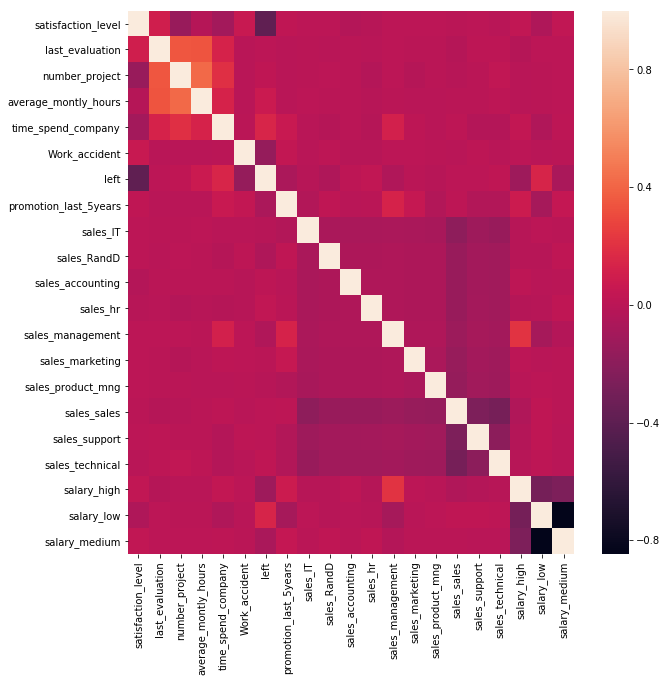

In [14]:
# The best way to visualize the correlations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, ax=ax)

The above graph confirms that there are really low correlations between the importants features

#### Before going deeper in our data analysis, we will scale the data 
   But before,let's remove  The 'left' column. It will be used as labels to derive a classification forecast model:
 

In [15]:
labels = hr_data['left']
hr_data = hr_data.drop('left', axis=1)



In [16]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hr_data)
scaled_arr_hr_data = scaler.transform(hr_data) # This numpy.ndarray will be used later
scaled_hr_data = pd.DataFrame(scaled_arr_hr_data, columns=hr_data.columns)


In [17]:
scaled_hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,-0.975824,1.151898
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,-0.975824,1.151898
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132


### Linear regression to understand inferences
To understand how the satisfaction_level (for example) changes as a function of others features, let's run a linear regression model between the following features :
* time_spend_company as an output
* last_evaluation, number_project, average_montly_hours, satisfaction_level, promotion_last_5years as entries


In [18]:
X = scaled_hr_data[['last_evaluation', 'number_project', 'average_montly_hours', 'satisfaction_level', 'promotion_last_5years']]
y = scaled_hr_data['time_spend_company']

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Print the intercept
print(lr.intercept_)

-8.05442970027e-18


In [21]:
# Display all the coefficients as a dataframe
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
last_evaluation,0.078947
number_project,0.139578
average_montly_hours,0.041145
satisfaction_level,-0.090206
promotion_last_5years,0.071420


** With the above linear model, we can see that there is a negative and weak relationship between the time spend in company and the satisfaction level, and a weak relationship between the time spend in company and the promotion_last_5years. 
Here is why the best and most experienced employees are leaving the company. **

## Data visualization

Before applying a classification forecast model to predict which employees could be leaving the company, let's visualize data to know if running a classification model would make a sense.

In this section, we will apply The Principal Component Analysis(PCA) algorithm on HR AB Consultants data and plot the result. That will allow us to detect if a forecast model with a reasonable decision boundary will help to predict with a good accuracy which employees could be leaving the company.

In [22]:
# Import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [23]:
pca.fit(scaled_arr_hr_data)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
hr_data_pca = pca.transform(scaled_arr_hr_data)


In [25]:
# shape of data after pca algorithm
hr_data_pca.shape

(14999L, 2L)

In [26]:
# component 1 weights per feature
pca.components_[0]

array([ 0.02716711,  0.16875414,  0.18803956,  0.17523178,  0.17781761,
        0.0310687 ,  0.13370799, -0.01151054,  0.021843  ,  0.01020514,
        0.02187837,  0.11127814,  0.01922992, -0.01362589, -0.02800253,
       -0.03268897, -0.02102667,  0.07531   , -0.66250597,  0.62709286])

In [27]:
# component 2 weights per feature
pca.components_[1]

array([-0.10905474,  0.46916513,  0.54485308,  0.51248417,  0.28643467,
       -0.01473337, -0.03246609,  0.00482758, -0.01859511,  0.00426175,
       -0.05123743,  0.02424726, -0.0250841 , -0.00283759, -0.01746485,
        0.00916621,  0.04971804, -0.02203538,  0.24734391, -0.2375018 ])

Text(0.5,1,u'PCA on HR_DATA')

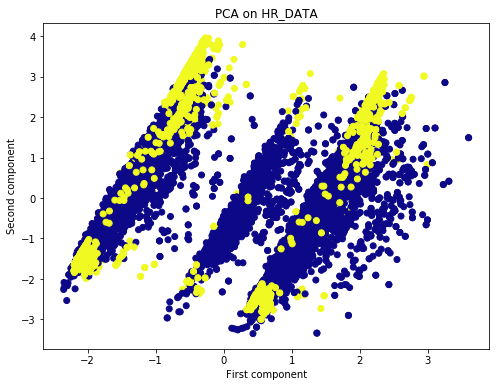

In [28]:
# Plot the 2 components on a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(hr_data_pca[:,0], hr_data_pca[:,1],c=labels,cmap='plasma')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA on HR_DATA')

** Based on the above graph, it makes sense to apply a classification model on the data **

## Model selection

In [29]:
# use a new dataframe after PCA
hr_data_pca_final = pd.DataFrame(hr_data_pca,columns=['first_component','second_component'])

In [30]:
hr_data_pca_final.head()

,first_component,second_component
0,-2.033064,-1.317782
1,2.121799,1.420103
2,2.162759,2.371953
3,-0.727866,1.860819
4,-2.036999,-1.320282


In [31]:
hr_data_pca_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
first_component     14999 non-null float64
second_component    14999 non-null float64
dtypes: float64(2)
memory usage: 234.4 KB


### Shuffle and Split Data

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hr_data_pca_final, labels, test_size = 0.3, random_state = 0)

In [33]:
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 10499 samples.
Testing set has 4500 samples.


### Train and cross validate models

In [34]:
# import needed librairies
from sklearn.model_selection import cross_val_score, GridSearchCV
import operator


        

In [35]:
# This function cross validate a list of learner return a dictionary with every learner algorithm with his f1 score
def select_model(params):
    results = {}
    for learner in params.items():
        scores = cross_val_score(learner[0], X_train, y_train,cv=10,scoring='f1')
        results[learner[1]] = scores.mean()
        
    results = sorted(results.items(), key=operator.itemgetter(1))
    
    return results
        

In [36]:
# Apply the above function on a group of classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

params = {KNeighborsClassifier(): "k-nearest",SVC():"svm",RandomForestClassifier():"randomforest",GaussianNB():"GaussianNB"}

print(select_model(params))

[(u'GaussianNB', 0.4924216863102549), (u'svm', 0.81117938351416341), (u'k-nearest', 0.83309601067670724), (u'randomforest', 0.88044878827898887)]


** Based on the f1 score, the RandomForestClassifier is the most promising model **

## Classifier optimization with gridsearch

In [37]:
param_grid =  [
    # try 20 (10×2) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [1,2]},
    # then try 20 (10x2) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [1,2]},
  ]

grid_search = GridSearchCV(RandomForestClassifier(), param_grid,cv=10,scoring='f1')

In [38]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{u'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90, 100], u'max_features': [1, 2]}, {u'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90, 100], u'max_features': [1, 2], u'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'f1', verbose=0)

In [39]:
#Get the best estimator
best_estimator = grid_search.best_estimator_
best_estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
grid_search.best_params_

{u'max_features': 1, u'n_estimators': 100}

In [41]:
# Get predictions on tests data
rfc_pred = best_estimator.predict(X_test)

In [42]:
#Import classification report
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      3462
          1       0.87      0.93      0.90      1038

avg / total       0.95      0.95      0.95      4500



In [44]:
# Instead of getting predictions, we could also get the probabilities if an employee is going to left or not
class_proba = best_estimator.predict_proba(X_test)

In [45]:
class_proba[0:10]

array([[ 0.22,  0.78],
       [ 0.99,  0.01],
       [ 0.81,  0.19],
       [ 1.  ,  0.  ],
       [ 0.99,  0.01],
       [ 0.99,  0.01],
       [ 0.96,  0.04],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.05,  0.95]])

In [46]:
# Create a dataframe of probabilities
df_probabilities = pd.DataFrame(class_proba,columns=['noleft','left'])

In [47]:
df_probabilities.index.name = 'left_probability'
df_probabilities.head(n=10)

,noleft,left
left_probability,,
0,0.22,0.78
1,0.99,0.01
2,0.81,0.19
3,1.00,0.00
4,0.99,0.01
5,0.99,0.01
6,0.96,0.04
7,1.00,0.00
8,1.00,0.00


## Conclusion

** As we have seen , there is a weak relationship in the company between employee experience and reward. Here is why the must experienced employees leave the company.
Futhermore, we have found that a random forest classifier is a good model to predict with a high f1-score if a employee will probably leave the company **